In [261]:
#--- Carga de las librerias y los datos (PUNTO 1)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

data = pd.read_csv('iris.data')
data.columns = ['s_length', 's_width', 'p_length', 'p_width', 'type']

data.head()

,s_length,s_width,p_length,p_width,type
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [262]:
#--- Escogencia de las dos variables importantes y clasificación binaria de los datos

x1 = 's_length'
x2 = 'p_length'
y_t = 'type'

data['type_n'] = [1 if x=='Iris-setosa' else 0 for x in data[y_t]] 
Y = data['type_n']

data.head()

,s_length,s_width,p_length,p_width,type,type_n
0,4.9,3.0,1.4,0.2,Iris-setosa,1
1,4.7,3.2,1.3,0.2,Iris-setosa,1
2,4.6,3.1,1.5,0.2,Iris-setosa,1
3,5.0,3.6,1.4,0.2,Iris-setosa,1
4,5.4,3.9,1.7,0.4,Iris-setosa,1


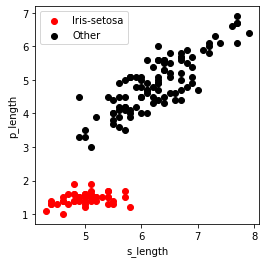

In [263]:
#--- Creación de las máscaras y visualización de los datos 

class_1 = data['type_n'] == 1
class_0 = data['type_n'] == 0

plt.figure(figsize=(4,4))
plt.scatter(data[x1][class_1], data[x2][class_1], c='red', label='Iris-setosa')
plt.scatter(data[x1][class_0], data[x2][class_0], c='black', label='Other')
plt.xlabel(x1)
plt.ylabel(x2)
plt.legend()
plt.show()

In [264]:
#--- Definimos el Perceptron

#--- Inicializamos los pesos en 0
b = 0
w_1 = 0
w_2 = 0

#--- Definimos nuestra función de activación, en este caso usamos un Sigmoide
def act(z):
  return 1/(1 + np.exp(-z))

#--- Nuestra función de visualización

def y(x):
 return -(b + w_1*x)/w_2

#--- Inicializamos el número de épocas y la rata de aprendizaje
n_epochs = 6      # Número de épocas
n = 0.5           # Tasa de aprendizaje

#--- Esta es la función nuestro perceptron encontrará al final de todas las épocas
def y(x):
 return -(b + w_1*x)/w_2

#--- Entrenamos el Perceptron
for epoch in range(n_epochs):
  for i,j,k in zip(data[x1],data[x2],Y):
    
    #--- Función de Suma
    z = i*w_1 + j*w_2 + b

    #--- Función de Activación
    sig_z = act(z)

    #--- Evaluamos la salida (output)
    if sig_z >= 0.5:
      out = 1
    if sig_z < 0.5:
      out = 0
    
    #--- Calculamos el error
    error = k - out

    #--- Actualizamos los pesos
    b = b + n*error
    w_1 += n*error*i
    w_2 += n*error*j

  print('Epoch [{}/{}], bias: {}, w1: {}, w2: {}'.format(epoch+1,n_epochs,b,w_1,w_2))

Epoch [1/6], bias: -0.5, w1: -3.5, w2: -2.35
Epoch [2/6], bias: 0.0, w1: -2.1999999999999997, w2: -3.35
Epoch [3/6], bias: 0.5, w1: -0.8999999999999995, w2: -4.3500000000000005
Epoch [4/6], bias: 1.0, w1: 1.5500000000000007, w2: -3.6500000000000004
Epoch [5/6], bias: 1.0, w1: 1.5500000000000007, w2: -3.6500000000000004
Epoch [6/6], bias: 1.0, w1: 1.5500000000000007, w2: -3.6500000000000004


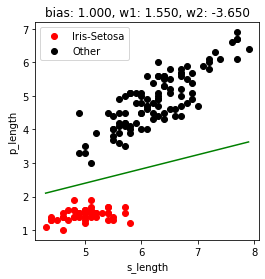

In [265]:
#-- Finalmente, graficamos nuestros resultados

fig = plt.figure(figsize=(4,4))
plt.plot(data[x1][class_1],data[x2][class_1],'o', c='red', label='Iris-Setosa')
plt.plot(data[x1][class_0],data[x2][class_0],'o', c='black', label='Other')
plt.plot(np.sort(data[x1]),y(np.sort(data[x1])),'-', c='green',)
plt.xlabel(x1)
plt.ylabel(x2)
plt.title('bias: {:.3f}, w1: {:.3f}, w2: {:.3f}'.format(b,w_1,w_2))
plt.legend()
plt.show()

In [266]:
#--- Carga de los datos (PUNTO 2)

data = pd.read_csv('iris.data')
data.columns = ['s_length', 's_width', 'p_length', 'p_width', 'type']

data.head()

,s_length,s_width,p_length,p_width,type
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [267]:
#--- Cargamos los features y los objetivos

X = data.drop(['type'], axis = 'columns')
Y = data['type']

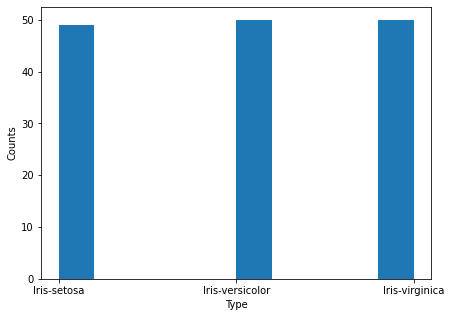

In [268]:
#--- Visualizamos los objetivos en un histograma

fig = plt.figure(figsize=(7,5))
plt.hist(Y)
plt.ylabel('Counts')
plt.xlabel('Type')
plt.show()

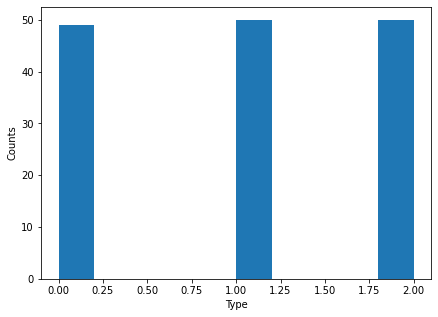

In [269]:
#--- Convertimos nuestro objetivo en números de un sistema terciario

Y = np.array(Y)

Y[Y=='Iris-setosa'] = 0
Y[Y=='Iris-versicolor'] = 1
Y[Y=='Iris-virginica'] = 2


fig = plt.figure(figsize=(7,5))
plt.hist(Y)
plt.ylabel('Counts')
plt.xlabel('Type')
plt.show()

In [270]:
#--- Dividimos nuestro dataset en Train/Test

X_train, X_test, Y_train, Y_test = train_test_split(X,Y)

In [271]:
#--- Utilizamos MLPCLassifier para buscar un modelo de 2 capas

model = MLPClassifier(activation='relu',  hidden_layer_sizes=(3, 3), solver='adam', learning_rate_init=0.1)
model

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(3, 3), learning_rate='constant',
              learning_rate_init=0.1, max_fun=15000, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [272]:
model.fit(X_train, list(Y_train))
Y_pred = model.predict(X_test)
Y_pred

array([1, 1, 1, 0, 1, 0, 2, 2, 2, 1, 2, 1, 2, 1, 0, 2, 2, 0, 2, 0, 1, 2,
       2, 2, 2, 2, 0, 2, 1, 0, 1, 2, 2, 1, 0, 1, 0, 0])

In [273]:
#--- Evaluamos el modelo con el accuracy_score

accuracy_score(Y_pred,list(Y_test))

0.9473684210526315

In [274]:
#--- Similarmente, para un modelo de 3 capas

model = MLPClassifier(activation='relu',  hidden_layer_sizes=(3, 3, 3), solver='adam', learning_rate_init=0.1)
model.fit(X_train, list(Y_train))
Y_pred = model.predict(X_test)
Y_pred

array([1, 1, 1, 0, 1, 0, 2, 2, 2, 1, 1, 1, 2, 1, 0, 2, 1, 0, 2, 0, 1, 1,
       2, 2, 2, 2, 0, 2, 1, 0, 1, 2, 2, 1, 0, 1, 0, 0])

In [275]:
#--- Y nuevamente lo evaluamos el modelo con el accuracy_score

accuracy_score(Y_pred,list(Y_test))

0.9736842105263158